In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import sqrt

In [3]:
np.random.seed(1)

In [4]:
# Produce dataset
xlim = [-1, 2]
b0 = 0.6
b1 = 1.7
n = 11
x = np.linspace(xlim[0], xlim[1], n)
y = b1 * x + b0 + np.random.rand(n)

In [5]:
current_params = [2.5, -7]

In [6]:
# Calculate gradient
# Partial derivative with respect to b_1
d_b1 = np.mean(np.multiply(-2 * x, y - current_params[0] - current_params[1] * x))
# Partial derivative with respect to b_0
d_b0 = np.mean(-2 * (y - current_params[0] - current_params[1] * x))

In [7]:
(d_b1, d_b0)

(-18.466903495932787, -5.548270471315975)

In [8]:
# Init
granularity = 1000
p1lim = [-10, 10]
p2lim = [-10, 10]
p1 = np.linspace(p1lim[0], p1lim[1], granularity)
p2 = np.linspace(p2lim[0], p2lim[1], granularity)
p1p1, p2p2 = np.meshgrid(p1, p2)

In [11]:
# Calculate loss 2d
params = None

xp = np.vstack((np.ones((1, x.shape[0])), x)).T
if params is None:
    b = np.vstack((p1p1.flatten(), p2p2.flatten()))
    yp = np.dot(xp, b)
    yl = np.repeat(y, granularity * granularity) \
           .reshape(y.shape[0], granularity * granularity)
    l = np.mean(np.power(yl - yp, 2), axis = 0).reshape(granularity, granularity)
else:
    yp = np.dot(xp, params)

In [25]:
norm = sqrt(d_b0 ** 2 + d_b1 ** 2)
unit_gradient = [-d_b0 / norm, -d_b1 / norm]
unit_gradient

[0.2877379800435559, 0.9577091702810695]

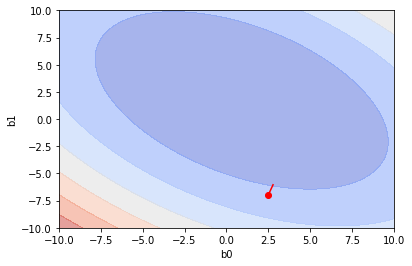

In [26]:
# plot loss 2d
fig, ax = plt.subplots()
ax.contourf(p1, p2, l, cmap = cm.coolwarm, alpha = 0.5)
ax.set_xlabel('b0')
ax.set_ylabel('b1')
plt.plot(current_params[0], current_params[1], 'ro')
plt.plot([current_params[0], current_params[0] + unit_gradient[0]],
         [current_params[1], current_params[1] + unit_gradient[1]],
         'r')